## Test 2 Jupyter Notebook
## Enya Liu el27773

Q12

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.cm as cm
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('~/Documents/pydata/training_data_ex.csv')
df_train

,f1,f2,label
0,0.243394,0.490532,1
1,-0.080299,-0.563845,1
2,0.560160,0.836795,0
3,0.512230,0.158225,1
4,-0.437234,-0.341925,1
...,...,...,...
7995,0.494917,0.092751,1
7996,-0.357585,-1.021077,0
7997,0.957343,0.389281,0
7998,-0.510308,-0.943451,0


In [3]:
df_test = pd.read_csv('~/Documents/pydata/test_data_ex.csv')
df_test

,f1,f2,label
0,0.278763,-0.439922,1
1,0.236923,-1.045364,0
2,-0.750667,-0.681287,0
3,1.035049,0.211380,0
4,0.894883,-0.373070,0
...,...,...,...
1995,-0.255742,0.975402,0
1996,0.265278,-0.328370,1
1997,-0.375094,-0.338054,1
1998,-0.301431,-0.422393,1


In [4]:
# separate x_train, y_train, x_test, y_test
x_train = np.array(df_train[['f1','f2']])
y_train = np.array(df_train['label'])
x_test = np.array(df_test[['f1','f2']])
y_test = np.array(df_test['label'])
model = LogisticRegression(penalty='none', fit_intercept=False)
model.fit(x_train, y_train)

LogisticRegression(fit_intercept=False, penalty='none')

In [5]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       980
           1       0.51      0.49      0.50      1020

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



Q13

In [6]:
from sklearn import svm

model2 = svm.SVC()
model2.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.496
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       980
           1       0.51      0.49      0.50      1020

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



Q14

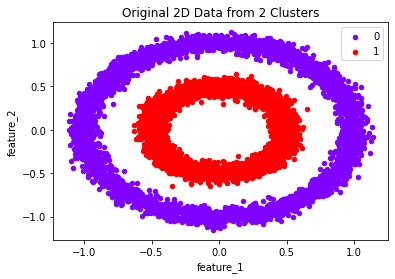

In [7]:
# tip: visualize it first?
import matplotlib.pyplot as plt
df = pd.DataFrame(dict(feature_1=x_train[:,0], feature_2=x_train[:,1], label=y_train))
cluster_name = set(y_train)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(2))
pyplot.show()

In [8]:
# use kernel function to improve svm result
model3 = svm.SVC(kernel = 'linear')
model3.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.496
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       980
           1       0.51      0.49      0.50      1020

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [9]:
# poly
model4 = svm.SVC(kernel = 'poly', degree = 2)
model4.fit(x_train, y_train)

y_pred = model4.predict(x_test)
print("Accuracy Score for poly kernel:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score for poly kernel: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [10]:
# sigmoid
model = svm.SVC(kernel = 'sigmoid')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy Score for sigmoid kernel:", accuracy_score(y_test, y_pred))

Accuracy Score for sigmoid kernel: 0.4965
